#### Multiple Linear Regression ISLR advertising

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\1000259375\AppData\Local\Temp\ipykernel_18884\2445647775.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
url = 'https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/ISLR/Advertising.csv'
df = pd.read_csv(url, usecols=[1,2,3,4])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


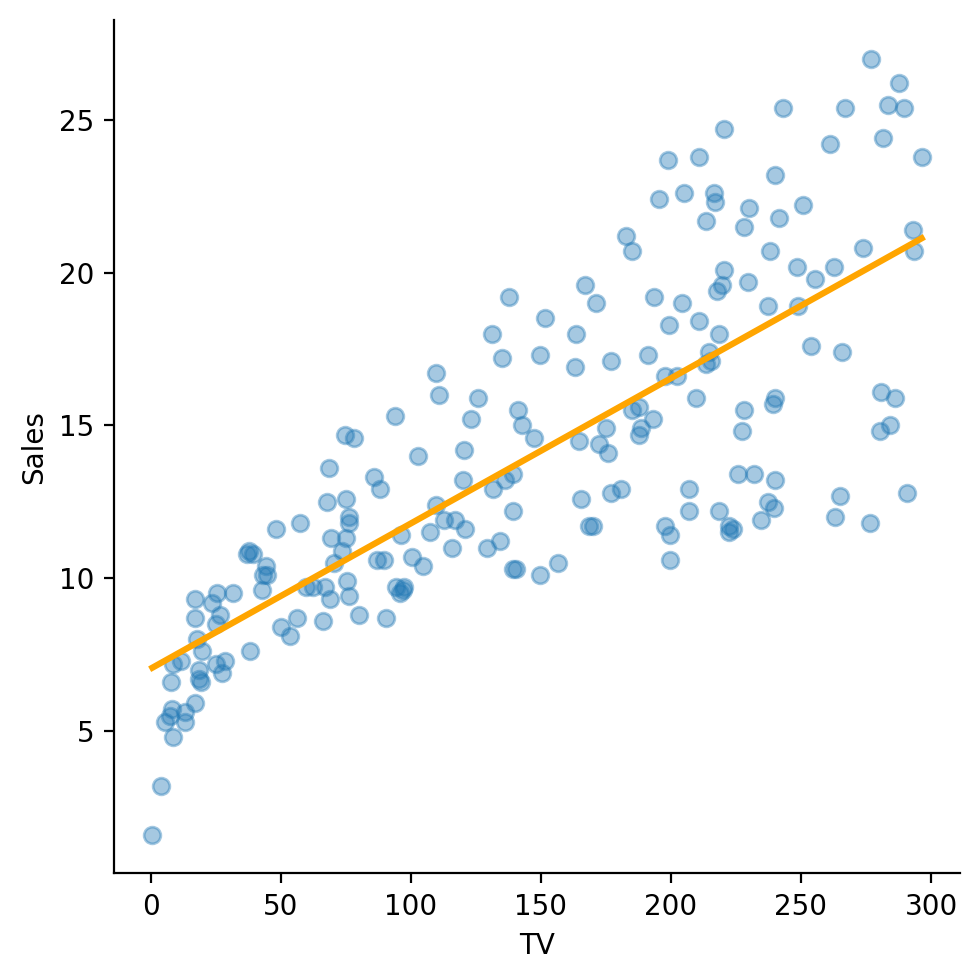

In [4]:
sns.lmplot(x='TV', y='Sales', data=df, ci=None,
scatter_kws={'alpha': 0.4}, # adjust data point transparancy
line_kws={'color':'orange'}
)

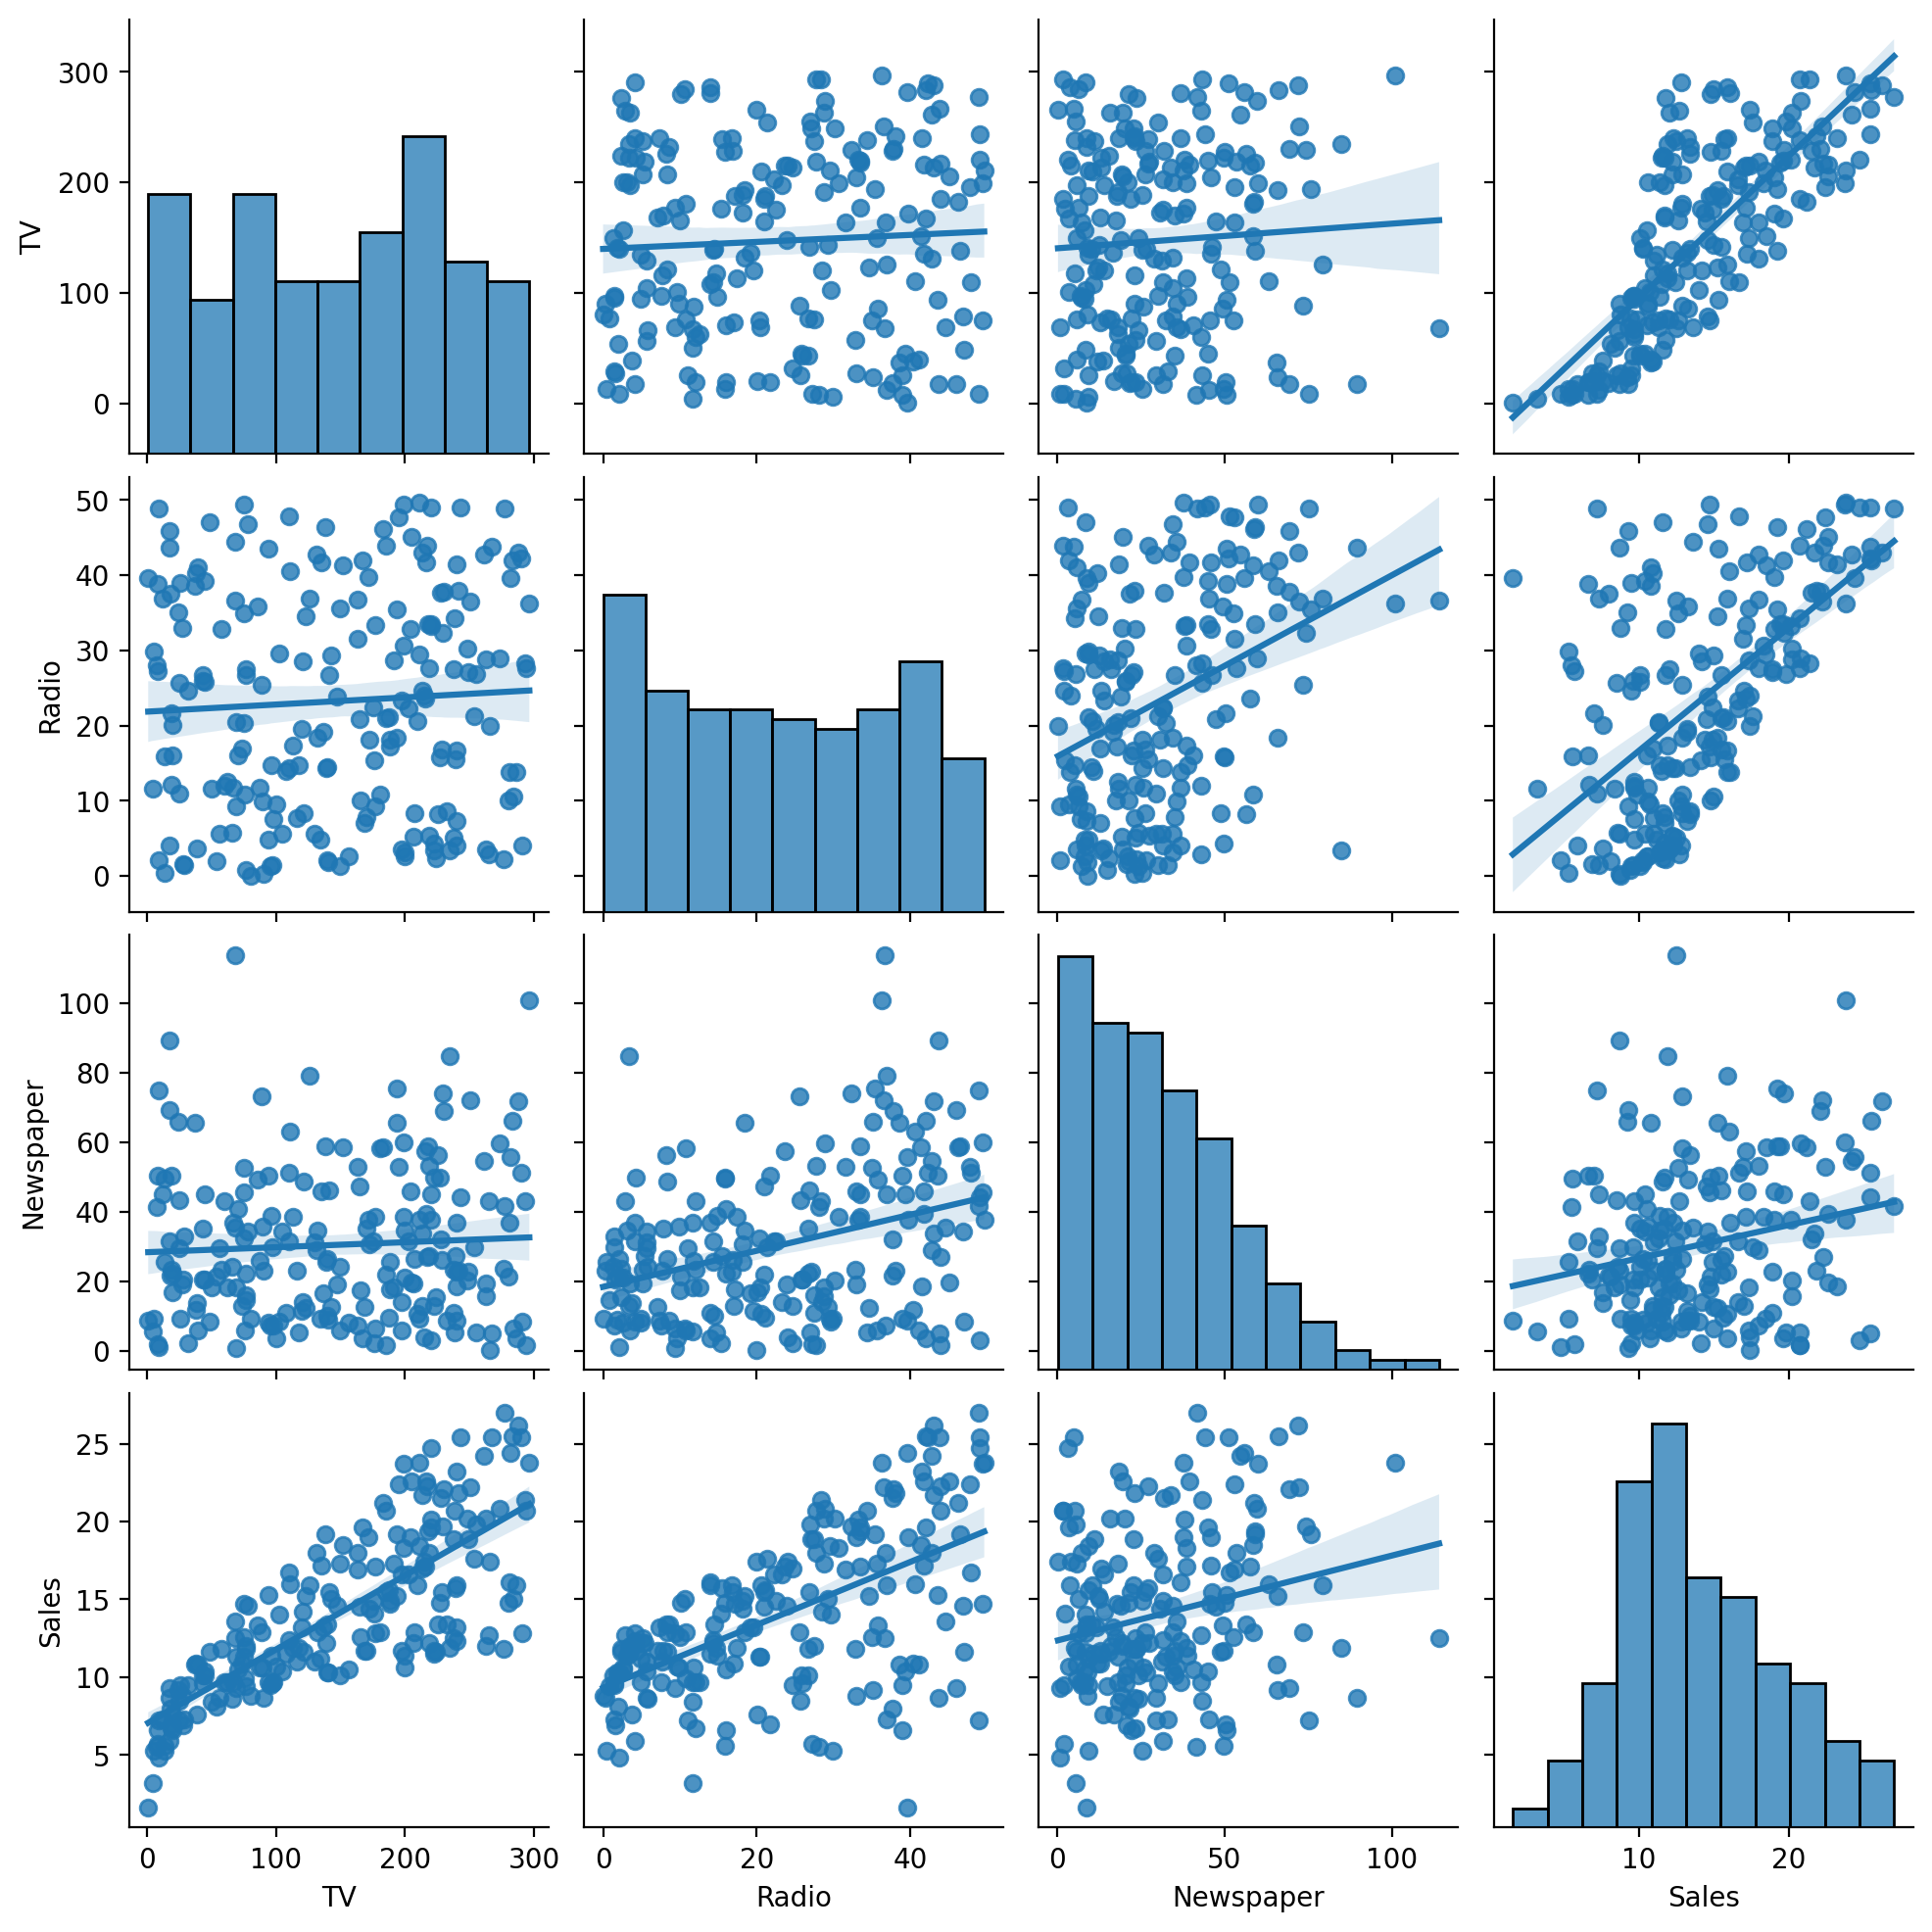

In [5]:
sns.pairplot(df, kind='reg')

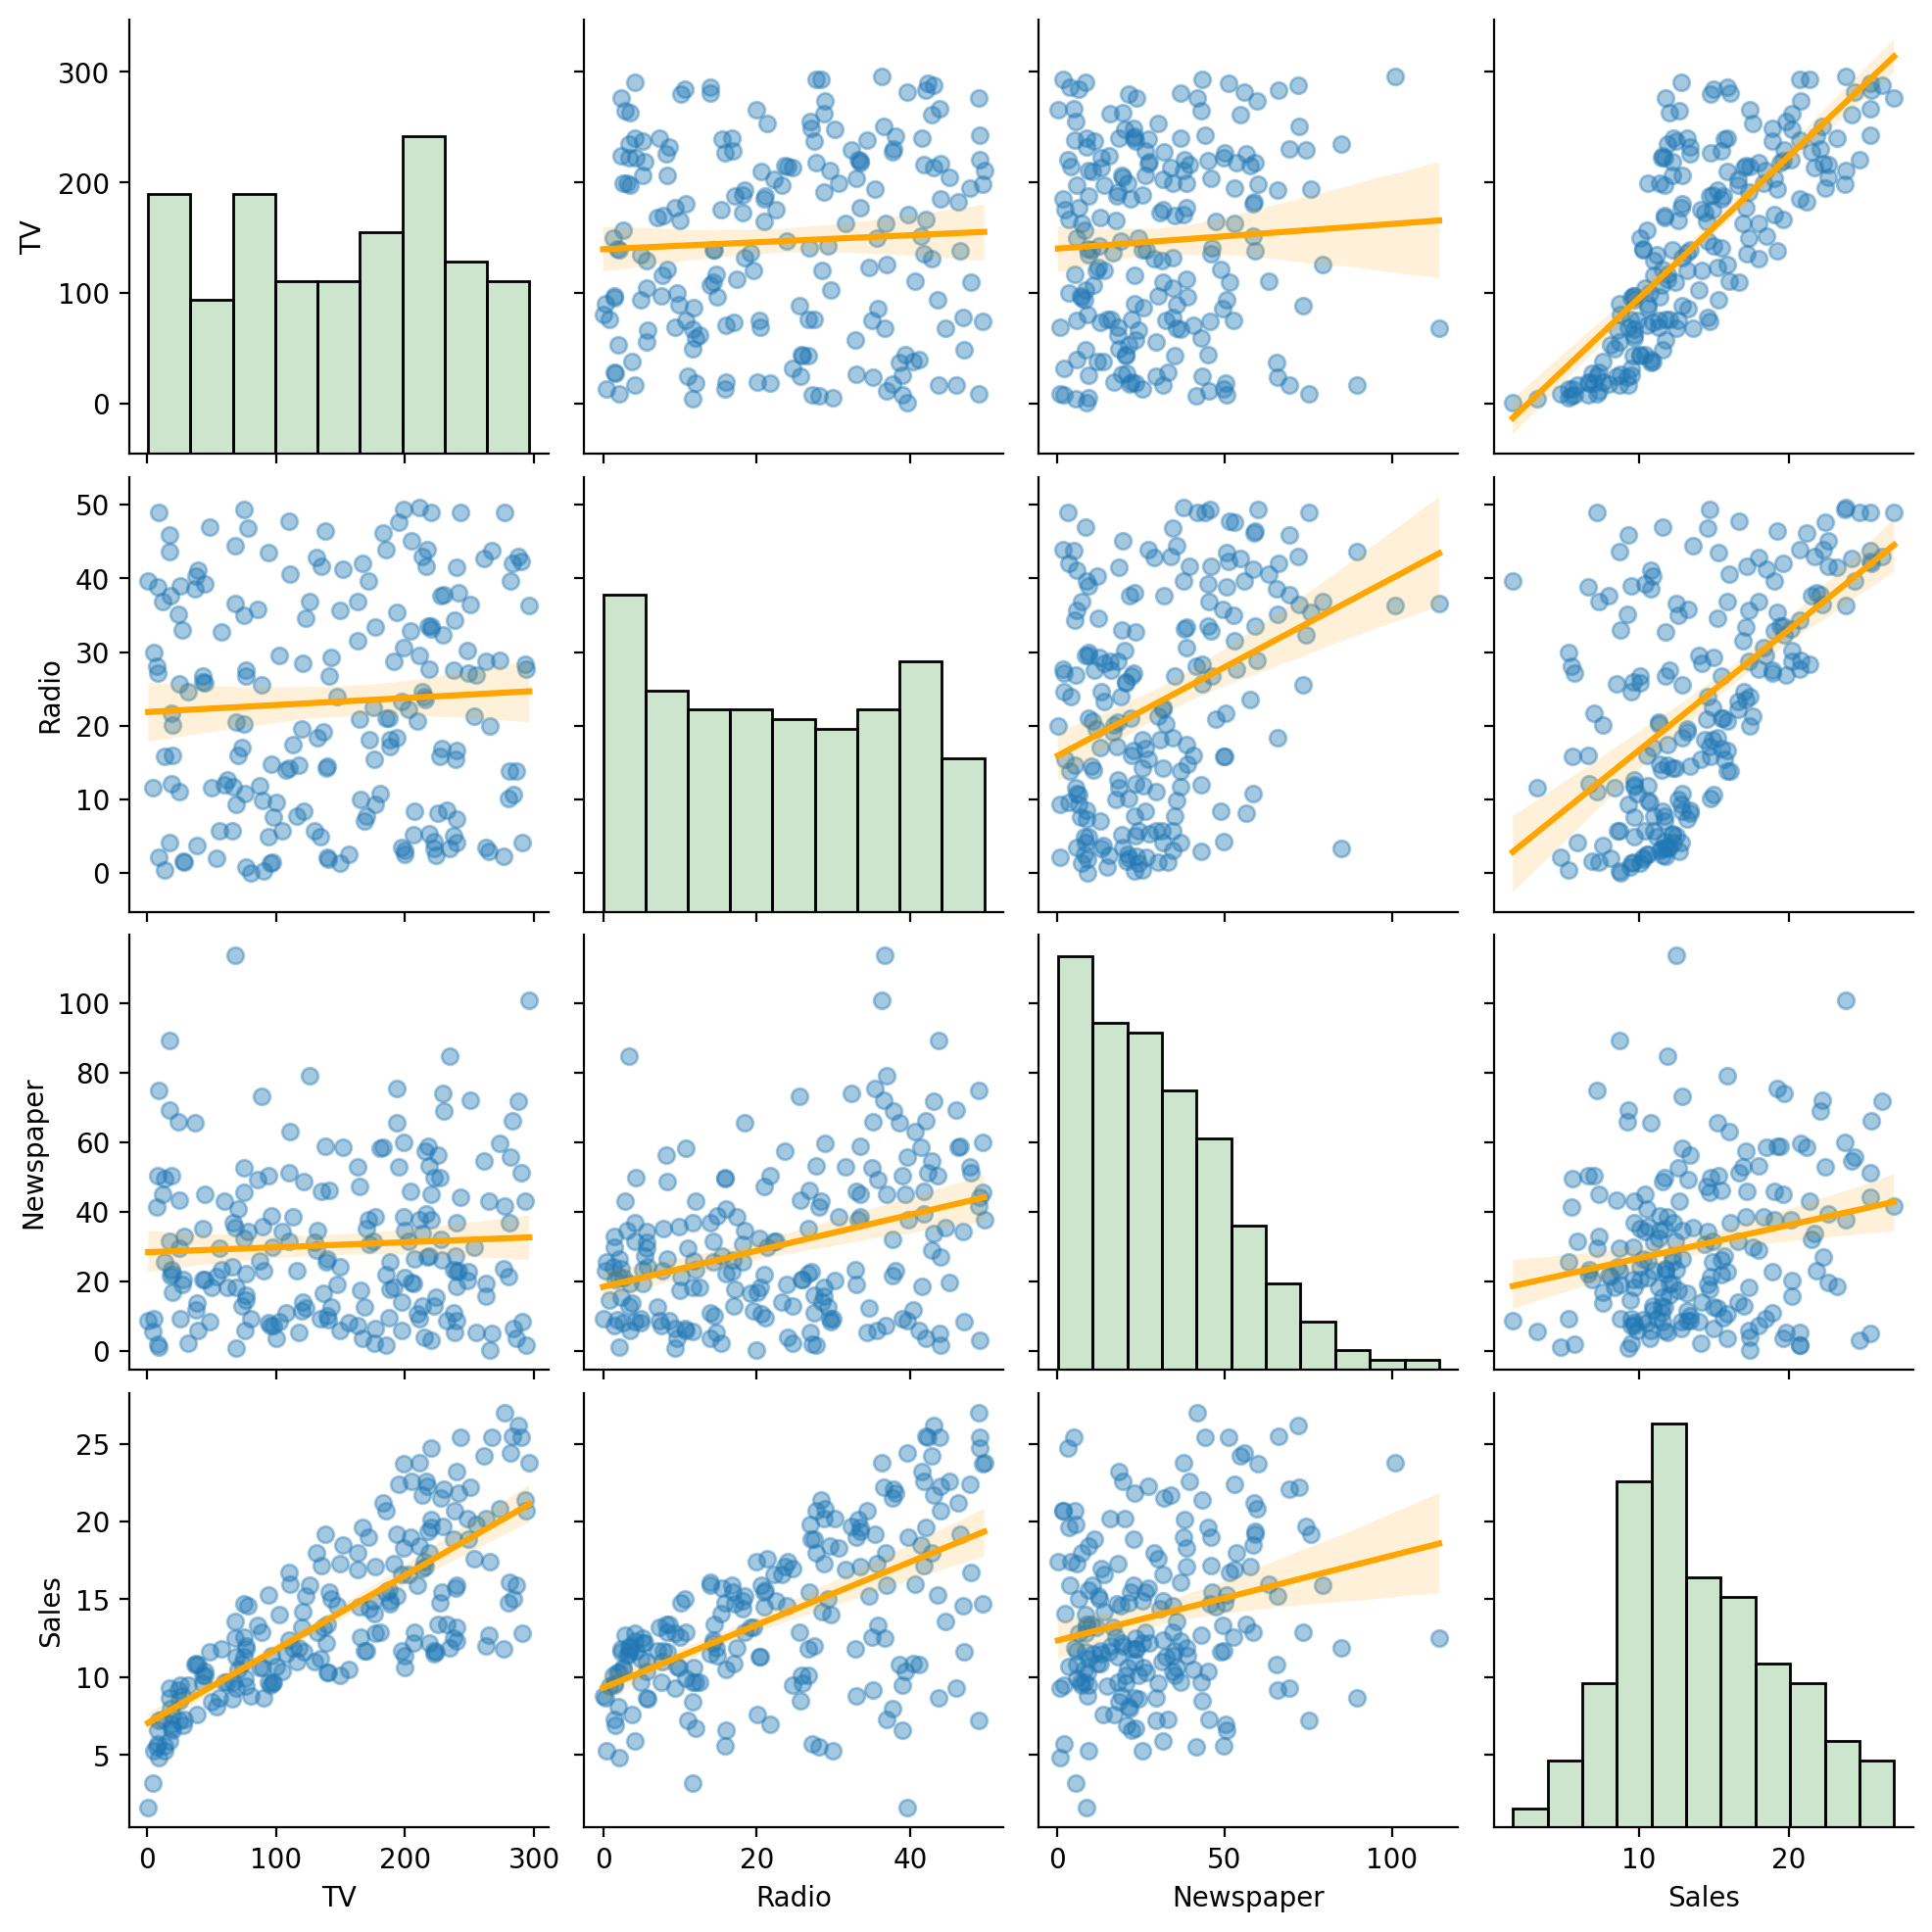

In [7]:
sns.pairplot(df,
    kind='reg',
    plot_kws={'scatter_kws': {'alpha':0.4},
    'line_kws':{'color': 'orange'}},
    diag_kws={'color': 'green', 'alpha':.2}
)

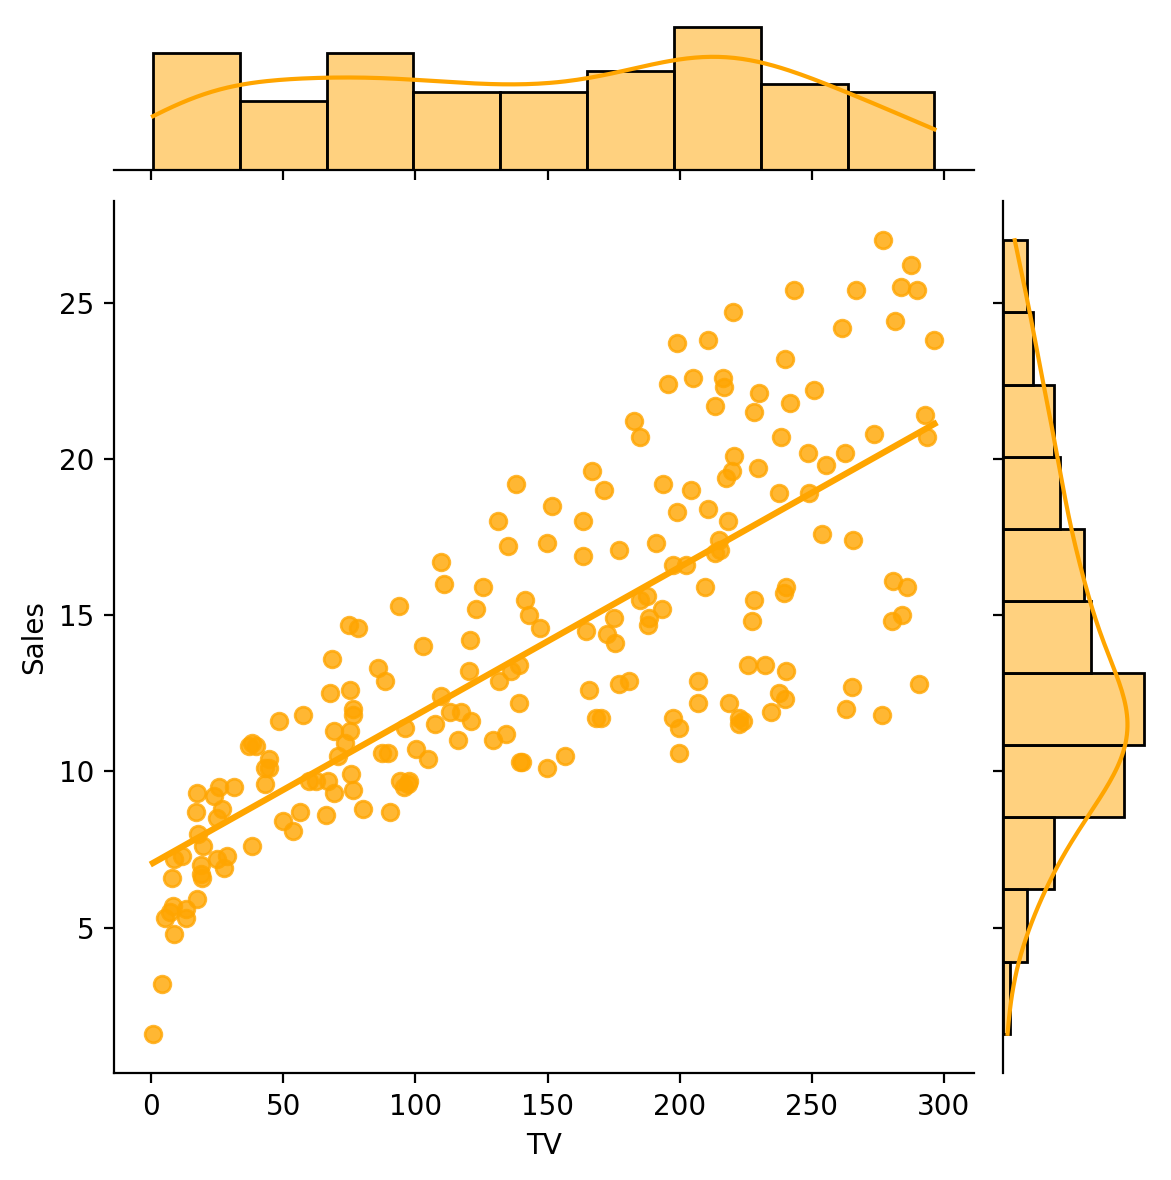

In [8]:
sns.jointplot(x='TV', y='Sales', data=df, kind='reg', ci=None,
color='orange')

#### sklearn: Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()
model

LinearRegression()

In [26]:
len(df)

200

In [28]:
X=df.drop(columns=['Sales'])[:140]
y=df['Sales'][:140]

In [29]:
len(X)

140

In [30]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [31]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
135    11.6
136     9.5
137    20.8
138     9.6
139    20.7
Name: Sales, Length: 140, dtype: float64

In [32]:
model.fit(X,y)

LinearRegression()

In [33]:
model.score(X,y) # R-squared

0.8937102367013778

In [34]:
model.intercept_

3.0451422090371167

In [35]:
model.coef_

array([ 0.04704868,  0.17968299, -0.00300557])

In [36]:
model.predict([[200,40,70]])

c:\Users\1000259375\Desktop\DE Project\PythonMLBasic\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43180837])

In [37]:
model.predict([[200,40,70],
                [100,80,50],
                [40,20,10]])

c:\Users\1000259375\Desktop\DE Project\PythonMLBasic\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43180837, 21.97437115,  8.49069357])

In [38]:
X_test = df.drop(columns=['Sales'])[140:]
X_test.head()

,TV,Radio,Newspaper
140,73.4,17.0,12.9
141,193.7,35.4,75.6
142,220.5,33.2,37.9
143,104.6,5.7,34.4
144,96.2,14.8,38.9


In [39]:
y_hat=model.predict(X_test)
y_hat

array([ 9.5143544 , 18.29202877, 19.27094064,  8.88723582, 10.11361706,
        9.96041972, 15.62706788, 23.1587013 , 12.03845031,  9.72212471,
       18.63809455, 10.10099867, 16.48589616, 18.12468609, 15.64364266,
        5.30523275, 15.12744231, 10.25358725, 10.09006252, 12.44362791,
       14.3210309 , 13.3616908 , 15.08443331, 17.32769433, 11.18435749,
       14.4341081 , 10.57847377, 13.65085298, 17.24682604, 18.30648623,
        7.42659652, 14.39756088,  7.52782982, 12.20541805, 14.08031808,
       24.73378746, 20.09744782, 12.3485591 , 16.40555117, 12.5803357 ,
       10.85519521, 14.21321462,  6.62420582, 24.08691176, 18.72317811,
       20.7349155 ,  9.90581943, 17.13834561, 18.98753788,  6.02878648,
       12.27110367,  8.5198605 ,  4.49610391, 18.42872767, 16.46701074,
        5.46575208,  8.33322951, 13.02457489, 23.73586521, 15.48426632])

In [41]:
dc = pd.concat([df[140:].reset_index(), pd.Series(y_hat, name='predicted')], axis='columns')
dc

,index,TV,Radio,Newspaper,Sales,predicted
0,140,73.4,17.0,12.9,10.9,9.514354
1,141,193.7,35.4,75.6,19.2,18.292029
2,142,220.5,33.2,37.9,20.1,19.270941
3,143,104.6,5.7,34.4,10.4,8.887236
4,144,96.2,14.8,38.9,11.4,10.113617
5,145,140.3,1.9,9.0,10.3,9.960420
6,146,240.1,7.3,8.7,13.2,15.627068
7,147,243.2,49.0,44.3,25.4,23.158701
8,148,38.0,40.3,11.9,10.9,12.038450
9,149,44.7,25.8,20.6,10.1,9.722125


#### Statsmodels: Multiple Linear Regression

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [43]:
model_a = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df[:140]).fit()

In [44]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     381.2
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           5.60e-66
Time:                        14:43:57   Log-Likelihood:                -273.89
No. Observations:                 140   AIC:                             555.8
Df Residuals:                     136   BIC:                             567.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0451      0.391      7.782      0.000       2.271       3.819
TV             0.0470      0.002     27.653      0.000       0.044       0.050
Radio          0.1797      0.011     16.665      0.000       0.158       0.201
Newspaper     -0.0030      0.007     -0.428      0.669      -0.017       0.011
==============================================================================
Omnibus:                       50.782   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.355
Skew:                          -1.459   Prob(JB):                     3.00e-29
Kurtosis:                       6.741   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model_a.params # coef

Intercept    3.045142
TV           0.047049
Radio        0.179683
Newspaper   -0.003006
dtype: float64

In [46]:
model_a.pvalues

Intercept    1.608608e-12
TV           1.091697e-57
Radio        1.161068e-34
Newspaper    6.689820e-01
dtype: float64

In [47]:
model.intercept_ # sklearn

3.0451422090371167

In [48]:
model.coef_ # sklearn

array([ 0.04704868,  0.17968299, -0.00300557])